# Convert HEALPix Zarr data to netCDF with variable subsets for TempestExtremes

## Author:
- Zhe Feng || zhe.feng@pnnl.gov

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import easygems.healpix as egh
import intake

plt.rcParams['figure.dpi'] = 72

### Load the catalog

In [2]:
list(intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"))

['EU', 'NCAR', 'NERSC', 'UK', 'online']

In [3]:
# Load the NERSC catalog
current_location = "NERSC"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]
list(cat)

['ERA5',
 'JRA3Q',
 'MERRA2',
 'icon_d3hp003',
 'icon_ngc4008',
 'ifs_tco3999-ng5_deepoff_eeriecloud',
 'ifs_tco3999-ng5_rcbmf',
 'scream2D_hrly',
 'scream_lnd',
 'scream_ne120',
 'scream_ne120_inst',
 'tracking',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9_TBv1p2',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

### Pick a Dataset

In [4]:
pd.DataFrame(cat["scream_ne120_inst"].describe()["user_parameters"])

,name,description,type,allowed,default
0,zoom,zoom resolution of the dataset,int,"[8, 7, 6, 5, 4, 3, 2, 1, 0]",2


### Load Data into a Data Set
most datasets have a `zoom` parameter. We will use `zoom` level 8 [(~24km)](https://easy.gems.dkrz.de/Processing/healpix/index.html#healpix-spatial-resolution)

In [5]:
zoom = 8
ds = cat["scream_ne120_inst"](zoom=zoom).to_dask()
ds = ds.pipe(egh.attach_coords)
ds

/global/common/software/m1867/python/hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 320GB
Dimensions:   (time: 3177, cell: 786432)
Coordinates:
  * time      (time) object 25kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
    lat       (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.1492
    lon       (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
    crs       int64 8B 0
  * cell      (cell) int64 6MB 0 1 2 3 4 ... 786427 786428 786429 786430 786431
Data variables: (12/34)
    huss      (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    iwp       (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    lwp       (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    omega500  (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    omega700  (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    omega850  (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    ...        ...
    vas       (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    vivt      (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    zg300     (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    zg500     (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    ELEV      (cell) float32 3MB dask.array<chunksize=(4096,), meta=np.ndarray>
    LANDFRAC  (cell) float32 3MB dask.array<chunksize=(4096,), meta=np.ndarray>
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          3
    averaging_frequency_units:    nhours
    averaging_type:               INSTANT
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

<Figure size 460.8x345.6 with 0 Axes>

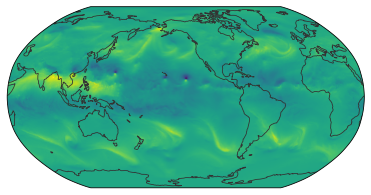

In [6]:
egh.healpix_show(ds.uivt.isel(time=10)) 

In [7]:
# Variables to output
varout = ['time', 'lat', 'lon', 'uivt', 'vivt', ]
# Subset variables
ds = ds[varout]
ds

<xarray.Dataset> Size: 20GB
Dimensions:  (time: 3177, cell: 786432)
Coordinates:
  * time     (time) object 25kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
    crs      int64 8B 0
  * cell     (cell) int64 6MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
Data variables:
    uivt     (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    vivt     (time, cell) float32 10GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          3
    averaging_frequency_units:    nhours
    averaging_type:               INSTANT
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

In [8]:
# For testing: subset a small chunk of time
dsout = ds.isel(time=slice(0, 100))
# Convert 'crs' from coordinate to data variable
dsout = dsout.reset_coords('crs')
dsout

<xarray.Dataset> Size: 648MB
Dimensions:  (time: 100, cell: 786432)
Coordinates:
  * time     (time) object 800B 2019-08-01 00:00:00 ... 2019-08-13 09:00:00
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
  * cell     (cell) int64 6MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
Data variables:
    uivt     (time, cell) float32 315MB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    vivt     (time, cell) float32 315MB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    crs      int64 8B 0
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          3
    averaging_frequency_units:    nhours
    averaging_type:               INSTANT
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

### Write to netCDF file

In [9]:
%%time
out_dir = '/pscratch/sd/w/wcmca1/scream-cess-healpix/data4TE/'
out_filename = f'{out_dir}scream2D_ne120_inst_ivt_hp{zoom}.nc'

# Set encoding options: chunk sizes, compression
encoding = {
    'time': {'contiguous': False},  # Important for unlimited dims
    'uivt': {'zlib': True, 'complevel': 1, 'chunksizes': [24, 4**6]},
    'vivt': {'zlib': True, 'complevel': 1, 'chunksizes': [24, 4**6]}
}

# # Setting the unlimited dimension takes 16s to write 100 times at zoom=8 (2 variables)
dsout.to_netcdf(out_filename, format='NETCDF4', unlimited_dims='time', mode='w', encoding=encoding)
print(f"Saved: {out_filename}")

Saved: /pscratch/sd/w/wcmca1/scream-cess-healpix/data4TE/scream2D_ne120_inst_ivt_hp8.nc
CPU times: user 15.2 s, sys: 1.67 s, total: 16.9 s
Wall time: 15.2 s
